In [1]:
import pm4py
import itertools
import time
import pandas as pd

NOTE: You need to have exported BPIC 15 Event Knowledge graph data as well as converted it to jsonocel in order to be able to run this evaluation.

In [2]:
exported_neo4j = '../../sample_data/lpg2ocel2023/data/bpic15.csv'
df_neo4j_export = pd.read_csv(exported_neo4j, 
                         dtype={'_id':"str", '_start':"str", '_end':"str", '_labels':"str"}, 
                         parse_dates=['timestamp'], low_memory=False, index_col=False)

In [3]:
log_name = 'BPIC15_{}'

df_neo4j_log1 = df_neo4j_export[df_neo4j_export['Log']==log_name.format(1)]

In [4]:
df_neo4j_log1_events = df_neo4j_log1[df_neo4j_log1['_labels']==':Event'][['_id']].reset_index(drop=True)

In [5]:
df_neo4j_log1_event_relations = df_neo4j_export.merge(df_neo4j_log1_events, left_on='_start', right_on='_id')

In [6]:
file_path = '../../sample_data/lpg2ocel2023/export/bpic15_BPIC15_{}.jsonocel'
ocel1 = pm4py.read_ocel(file_path.format(1))

d:\workspace\venv\.lpg2ocel\lib\site-packages\pm4py\util\dt_parsing\parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  "ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11")


In [7]:
ocdfg1 = pm4py.discover_ocdfg(ocel1)

In [8]:
filtered_ocel  = pm4py.filter_ocel_events(ocel1, ['258133','258134','258135','177893'])
filtered_ocel = pm4py.filter_ocel_object_attribute(filtered_ocel, "ocel:type", ["Application", "Case_R"], positive=True)

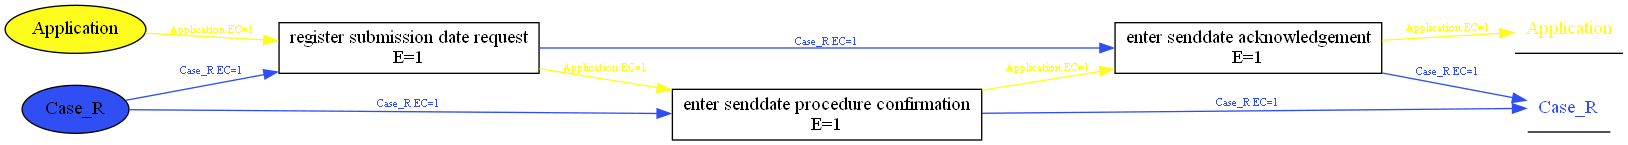

In [9]:
filtered_ocdfg = pm4py.discover_ocdfg(filtered_ocel)
pm4py.view_ocdfg(filtered_ocdfg, format="png")